In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from collections import defaultdict
import json

In [6]:
df = pd.read_csv('../FlightDelays.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
carrier = defaultdict(int) # number of comments per subreddit
fl_num = defaultdict(int) # number of comments per user
df_carrier = df['CARRIER']
df_fl_num =  df['FL_NUM']


In [17]:
for line in df_carrier:
    #print(line)
    carrier[line]+=1

In [19]:
score=0
for k, v in carrier.items():
    #print(v)
    score += v
score

10915495

In [20]:
for line in df_fl_num:
    #print(line)
    fl_num[line]+=1

In [21]:
df_carrier_fl_num = df[['CARRIER','FL_NUM']]

In [24]:
carrier_fl_num = defaultdict(int)
for line in df_carrier_fl_num.itertuples():
    # line[1] is carrier
    key = str(line[1]) +" "+  str(line[2])
    # line [2] is fl_num
    #print(key)
    carrier_fl_num[key]+=1

In [25]:
len(carrier_fl_num)

32047

In [26]:
df_9e = df[df['CARRIER']=='9E']

In [27]:
df_9e_3331 = df[(df['CARRIER']=='9E') & (df['FL_NUM']==3331)]

In [28]:
df_9e_3331['ORIGIN'].unique()

array(['ABY', 'DTW', 'MDT', 'MSP', 'SAT', 'CAE', 'HPN', 'LGA', 'EWR',
       'STL', 'TYS', 'BOS', 'ATL', 'AVL', 'BMI', 'LEX', 'AGS', 'JFK',
       'RDU', 'SHV', 'MOB', 'MLI', 'SYR', 'CLT', 'SDF', 'TPA', 'DCA',
       'PWM', 'CID', 'CVG', 'ORD'], dtype=object)

In [29]:
df_9e_3331.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'CARRIER', 'FL_NUM', 'Route', 'ORIGIN', 'DEST', 'DEST_CITY',
       'DEST_STATE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'PASSENGERS', 'EMPFULL', 'EMPPART', 'EMPTOTAL',
       'EMPFTE', 'NET_INCOME', 'OP_REVENUES'],
      dtype='object')

In [30]:
df_9e_3331['DEST'].unique()

array(['ATL', 'MDT', 'DTW', 'CMH', 'MSP', 'SAV', 'JFK', 'ROC', 'LGA',
       'ORF', 'IAH', 'AVL', 'CAE', 'GTR', 'LEX', 'AGS', 'ORD', 'BNA',
       'CVG', 'MOB', 'EVV', 'MKE', 'TPA', 'RDU', 'IND', 'MIA', 'BOS',
       'DFW'], dtype=object)

In [31]:
df_corr = df_9e_3331.corr()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


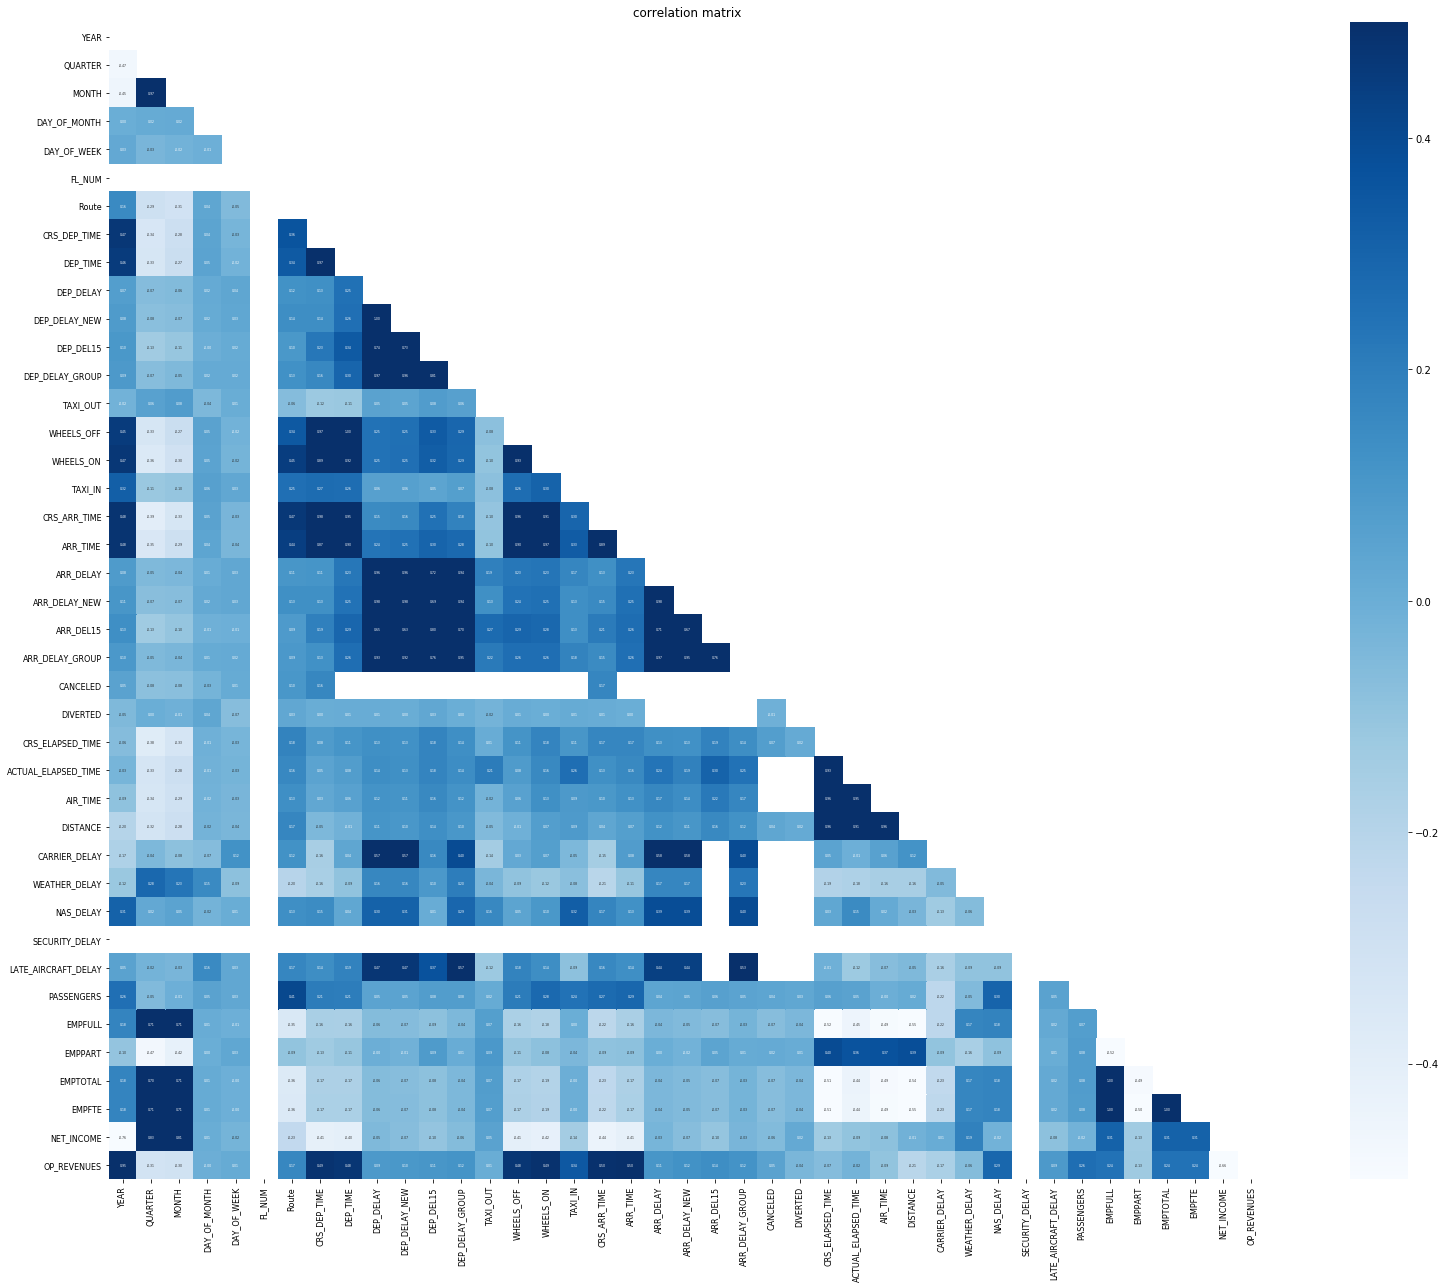

In [32]:
arr_corr = df_corr.as_matrix()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan
fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)
ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_endeavour_3331.png", dpi=300)

In [123]:
max(carrier_fl_num, key=carrier_fl_num.get)

'AS 64'

In [125]:
df_alaska_64 = df[(df['CARRIER']=='AS') & (df['FL_NUM']==64)]

In [127]:
df_alaska_64['DEST'].unique()

array(['JNU', 'PSG', 'SEA', 'WRG', 'KTN'], dtype=object)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


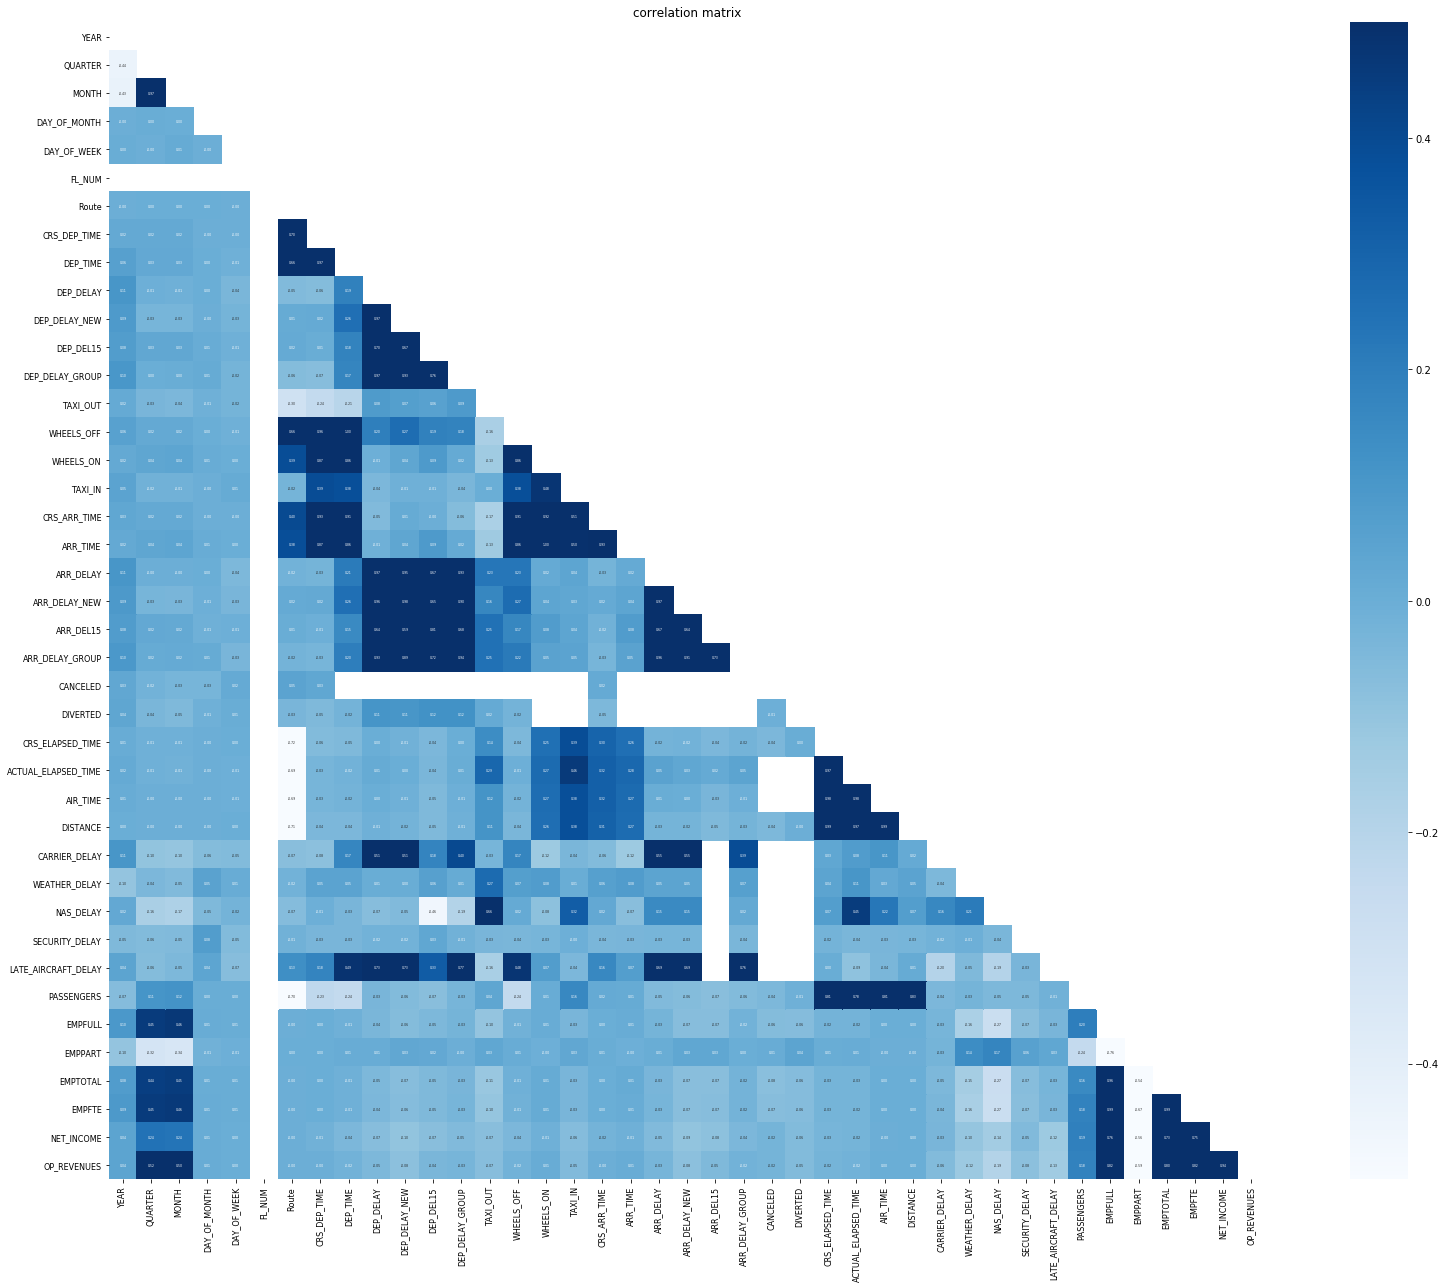

In [131]:
df_corr = df_alaska_64.corr()
arr_corr = df_corr.as_matrix()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan
fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_alaska_64.png", dpi=300)

In [138]:
df_alaska_64['Route'].unique()

array([ 119, 3141, 3162, 5230, 6657])

In [139]:
df_9e_3331['Route'].unique()

array([  42, 1980, 3753, 4118, 5614,  910, 2646, 3520, 1969, 2164, 2008,
       6319, 6584,  722,  225,  159,  172,  217,  236,  392,  582, 3427,
       3492,   66,  153, 3104, 3456, 4120, 5353, 6010,  253, 4033,  198,
        714, 4016, 6397, 1124, 5383, 5723, 6482, 1447, 1965, 1482, 5293,
        985, 3069, 1294, 1305, 4606])

In [201]:
df[(df['CARRIER']=='UA') & (df['QUARTER']==2)]['OP_REVENUES'].unique()

array([6689312.41,        nan, 7087134.27])

In [192]:
df[df['CARRIER']=='DL'][df['MONTH']==7]['YEAR'].unique()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([2018])

In [180]:
df[df['ORIGIN']=='LGA']['DEST'].unique()

array(['BGR', 'BNA', 'BTV', 'BUF', 'CAE', 'CHO', 'CHS', 'CLE', 'CLT',
       'CMH', 'CVG', 'DAY', 'DSM', 'GRR', 'GSO', 'GSP', 'IND', 'JAX',
       'MCI', 'MEM', 'MHT', 'MKE', 'MSN', 'MSY', 'ORF', 'PIT', 'PWM',
       'RDU', 'RIC', 'ROC', 'RSW', 'SAV', 'SDF', 'SRQ', 'STL', 'SYR',
       'TYS', 'ATL', 'BOS', 'DCA', 'DFW', 'MCO', 'MIA', 'ORD', 'PHL',
       'FLL', 'PBI', 'DEN', 'DTW', 'MSP', 'TPA', 'BHM', 'LEX', 'OMA',
       'XNA', 'ILM', 'ROA', 'MYR', 'CAK', 'DAL', 'IAH', 'MTJ', 'HOU',
       'MDW', 'IAD', 'AGS', 'PHX', 'ACK', 'AVL', 'MVY', 'TVC', 'BZN',
       'CHA', 'SBN', 'SAT', 'EGE', 'EYW', 'DAB', 'JAC', 'HHH'],
      dtype=object)

In [3]:
airfares = pd.read_csv('AirFares.csv')

In [4]:
airfares[(airfares['Origin']=='LGA') & (airfares['Dest']=='IAH')]

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
5115,2018,1,LGA,NY,IAH,TX,1465,263.01,UA,0.5636,309.27,WN,0.1514,182.27
16059,2018,2,LGA,NY,IAH,TX,1465,272.97,UA,0.5550,317.63,WN,0.1332,218.33
27655,2018,3,LGA,NY,IAH,TX,1465,269.13,UA,0.5376,313.52,WN,0.1426,212.59
39124,2018,4,LGA,NY,IAH,TX,1465,274.39,UA,0.5837,305.98,WN,0.1341,222.04
50386,2019,1,LGA,NY,IAH,TX,1465,262.81,UA,0.5704,300.36,WN,0.1380,188.62
62011,2019,2,LGA,NY,IAH,TX,1465,261.23,UA,0.5380,302.93,WN,0.1313,211.85
74234,2019,3,LGA,NY,IAH,TX,1465,250.50,UA,0.5179,291.55,WN,0.1392,203.80


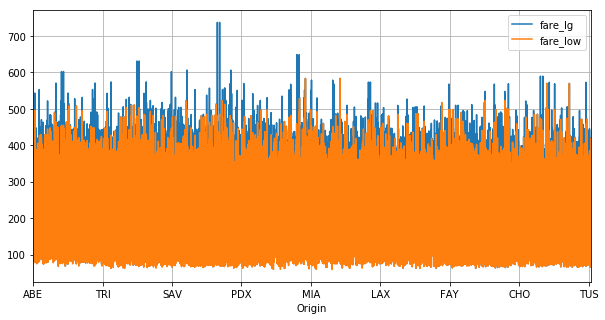

In [5]:
airfares['diff'] = airfares['fare_lg'] - airfares['fare_low']
airfares.plot(x='Origin', y=['fare_lg', 'fare_low'], figsize=(10,5), grid=True)

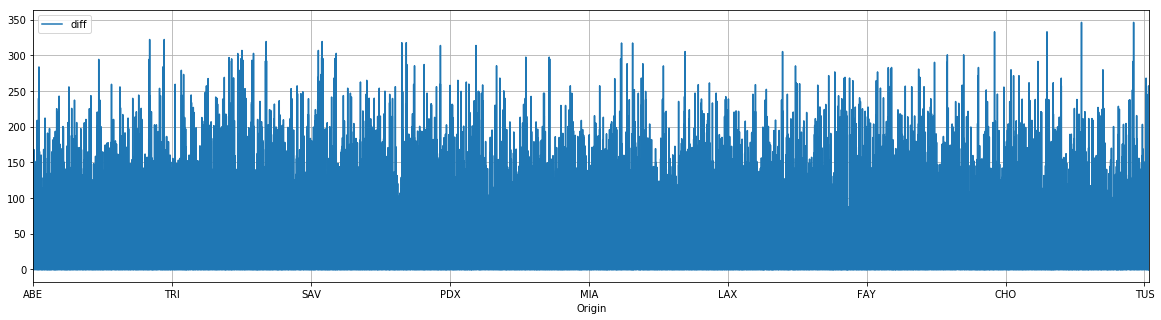

In [11]:
airfares.plot(x='Origin', y='diff', figsize=(20,5),grid=True).figure.savefig('demo-file.png')

In [4]:
airfares.head(5)

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2018,1,ABE,PA,ATL,GA,692,286.40,DL,0.9455,287.18,AA,0.0339,263.31
1,2018,1,ABE,PA,BNA,TN,685,234.59,AA,0.5686,227.73,AA,0.5686,227.73
2,2018,1,ABE,PA,CLT,NC,481,289.19,AA,0.9518,288.46,AA,0.9518,288.46
3,2018,1,ABE,PA,DEN,CO,1539,263.12,UA,0.4737,255.18,UA,0.4737,255.18
4,2018,1,ABE,PA,DFW,TX,1307,261.68,AA,0.6448,260.94,UA,0.1081,200.66


In [7]:
revenues = df[['CARRIER','YEAR','QUARTER','OP_REVENUES']]
revenues= revenues.drop_duplicates().dropna()
revenues.head(5)

,CARRIER,YEAR,QUARTER,OP_REVENUES
0,9E,2018,1,674.25
18234,AA,2018,1,1730210.46
92125,AS,2018,1,1737771.00
107437,B6,2018,1,394363.80
132308,DL,2018,1,7162960.00


In [12]:
revenues.columns = ['carrier_lg', 'Year','quarter','OP_REVENUES']

In [11]:
airfares = pd.merge(airfares, revenues,  how='left', on =['carrier_low','Year','quarter'])#, left_on=['A_c1','c2'], right_on = ['B_c1','OP_REVENUES'])
#for index,row in airfares.iterrows():
#    for index2,row2 in revenues.iterrows():
#            row['revenues_lg'] = revenues[(row['quarter']== row2['QUARTER']) & (row['Year']==row2['YEAR']) & (row['carrier_lg']==row2['CARRIER'])]['OP_REVENUES']
#            print(row)
#            break
#airfares['revenues_lg'] = revenues[(revenues['QUARTER']==airfares['quarter']) & (revenues['YEAR']==airfares['YEAR']) & (revenues['CARRIER']==airfares['carrier_lg'])]

In [13]:
airfares
airfares = pd.merge(airfares, revenues,  how='left', on =['carrier_lg','Year','quarter'])#, left_on=['A_c1','c2'], right_on = ['B_c1','OP_REVENUES'])

In [18]:
df[(df['CARRIER']=='DL') & (df['QUARTER']==1) & (df['YEAR']==2018)]['OP_REVENUES'].unique()

array([7162960.,      nan])

In [15]:
airfares.rename(columns={'OP_REVENUES':'op_revenues_lg'}, inplace=True)

In [16]:
airfares.rename(columns={'OP_REVENUES_low':'op_revenues_low'}, inplace=True)

In [22]:
airfares.head(5)

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg
0,2018,1,ABE,PA,ATL,GA,692,286.40,DL,0.9455,287.18,AA,0.0339,263.31,1730210.46,7162960.00
1,2018,1,ABE,PA,BNA,TN,685,234.59,AA,0.5686,227.73,AA,0.5686,227.73,1730210.46,1730210.46
2,2018,1,ABE,PA,CLT,NC,481,289.19,AA,0.9518,288.46,AA,0.9518,288.46,1730210.46,1730210.46
3,2018,1,ABE,PA,DEN,CO,1539,263.12,UA,0.4737,255.18,UA,0.4737,255.18,5475423.97,5475423.97
4,2018,1,ABE,PA,DFW,TX,1307,261.68,AA,0.6448,260.94,UA,0.1081,200.66,5475423.97,1730210.46


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


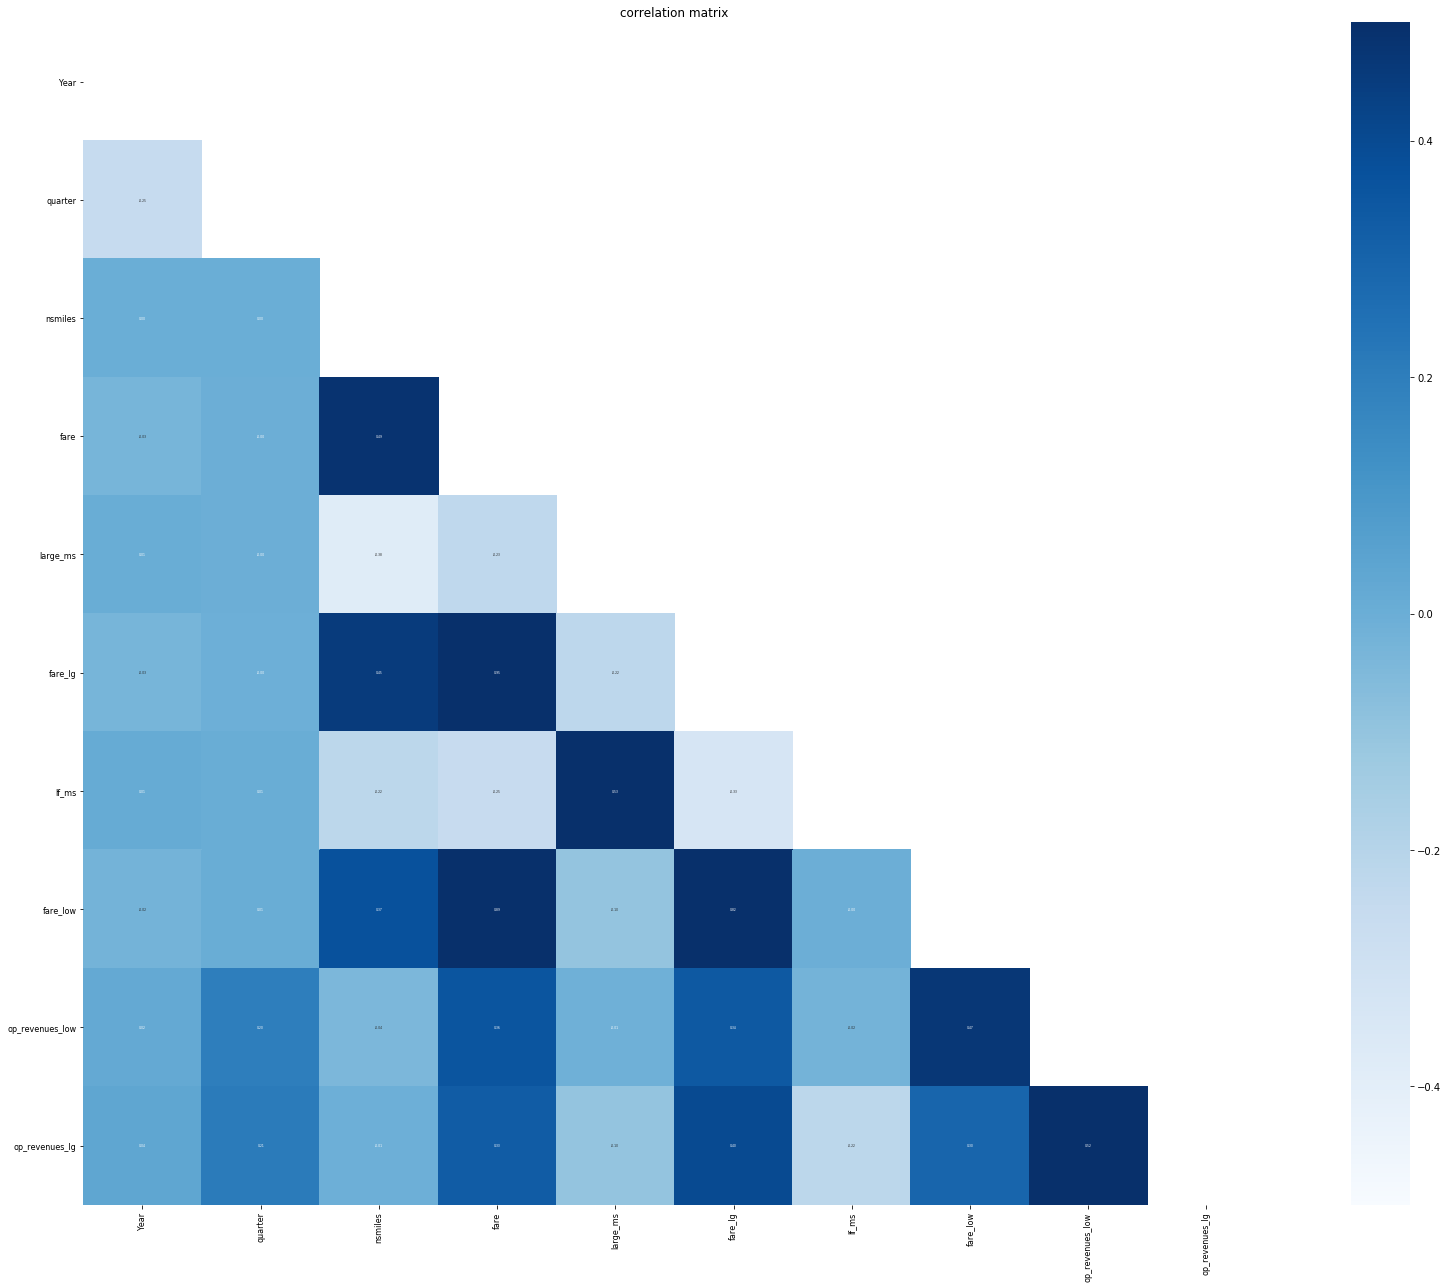

In [21]:
df_corr = airfares.corr()
arr_corr = df_corr.as_matrix()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan
fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_airfares.png", dpi=300)

In [25]:
airfares[(airfares['carrier_low']==airfares['carrier_lg']) & (airfares['large_ms']==1)]

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg
18,2018,1,ABE,PA,PGD,FL,1018,108.13,G4,1.0,108.13,G4,1.0,108.13,412680.86,412680.86
22,2018,1,ABE,PA,SFB,FL,882,94.87,G4,1.0,94.87,G4,1.0,94.87,412680.86,412680.86
25,2018,1,ABI,TX,DFW,TX,158,223.77,AA,1.0,223.77,AA,1.0,223.77,1730210.46,1730210.46
27,2018,1,ABI,TX,LAS,NV,920,318.28,AA,1.0,318.28,AA,1.0,318.28,1730210.46,1730210.46
106,2018,1,ABR,SD,PHX,AZ,1099,330.59,DL,1.0,330.59,DL,1.0,330.59,7162960.00,7162960.00
109,2018,1,ACY,NJ,MCO,FL,852,88.89,NK,1.0,88.89,NK,1.0,88.89,56331.04,56331.04
110,2018,1,ACY,NJ,MIA,FL,977,94.59,NK,1.0,94.59,NK,1.0,94.59,56331.04,56331.04
111,2018,1,ACY,NJ,MYR,SC,466,87.08,NK,1.0,87.08,NK,1.0,87.08,56331.04,56331.04
112,2018,1,ACY,NJ,PBI,FL,936,99.86,NK,1.0,99.86,NK,1.0,99.86,56331.04,56331.04
113,2018,1,ACY,NJ,RSW,FL,982,98.58,NK,1.0,98.58,NK,1.0,98.58,56331.04,56331.04


In [26]:
df.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25


In [30]:
net_income = df[['CARRIER','YEAR','QUARTER','NET_INCOME']]
net_income= net_income.drop_duplicates().dropna()
net_income.head(5)

,CARRIER,YEAR,QUARTER,NET_INCOME
0,9E,2018,1,-126.37
18234,AA,2018,1,308067.99
92125,AS,2018,1,23052.00
107437,B6,2018,1,56060.07
132308,DL,2018,1,325483.00


In [31]:
#add the net income to airfares
net_income.columns = ['carrier_lg', 'Year','quarter','net_income_lg']
airfares = pd.merge(airfares, net_income,  how='left', on =['carrier_lg','Year','quarter'])#, left_on=['A_c1','c2'], right_on = ['B_c1','OP_REVENUES'])


In [32]:
#add net income of lower airline to airfares
net_income.columns = ['carrier_low', 'Year','quarter','net_income_low']
airfares = pd.merge(airfares, net_income,  how='left', on =['carrier_low','Year','quarter'])#, left_on=['A_c1','c2'], right_on = ['B_c1','OP_REVENUES'])

In [37]:
df[(df['CARRIER']=='UA') & (df['QUARTER']==1) & (df['YEAR']==2018)]['NET_INCOME'].unique()

array([127138.49,       nan])

In [38]:
airfares.head(5)

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg,net_income_lg,net_income_low
0,2018,1,ABE,PA,ATL,GA,692,286.40,DL,0.9455,287.18,AA,0.0339,263.31,1730210.46,7162960.00,325483.00,308067.99
1,2018,1,ABE,PA,BNA,TN,685,234.59,AA,0.5686,227.73,AA,0.5686,227.73,1730210.46,1730210.46,308067.99,308067.99
2,2018,1,ABE,PA,CLT,NC,481,289.19,AA,0.9518,288.46,AA,0.9518,288.46,1730210.46,1730210.46,308067.99,308067.99
3,2018,1,ABE,PA,DEN,CO,1539,263.12,UA,0.4737,255.18,UA,0.4737,255.18,5475423.97,5475423.97,127138.49,127138.49
4,2018,1,ABE,PA,DFW,TX,1307,261.68,AA,0.6448,260.94,UA,0.1081,200.66,5475423.97,1730210.46,308067.99,127138.49


Data Analysis

In [42]:
len(airfares)

80344

In [43]:
lg_grouped_airfares = airfares.groupby('carrier_lg')

In [53]:
lg_grouped_airfares.groups

{'AA': Int64Index([    1,     2,     4,     6,     8,    11,    15,    17,    19,
                20,
             ...
             80334, 80335, 80336, 80337, 80338, 80339, 80340, 80341, 80342,
             80343],
            dtype='int64', length=25626),
 'AS': Int64Index([   78,    95,   527,   542,   549,   561,   841,   853,   857,
               887,
             ...
             79375, 79569, 79588, 79590, 79594, 79596, 79597, 79605, 79858,
             80067],
            dtype='int64', length=1796),
 'B6': Int64Index([   63,   705,   716,  1120,  1124,  1126,  1172,  1174,  1185,
              1191,
             ...
             78861, 78883, 78983, 79291, 79337, 79405, 79427, 79618, 79647,
             79753],
            dtype='int64', length=660),
 'DL': Int64Index([    0,     5,     7,     9,    10,    13,    14,    23,    31,
                60,
             ...
             80274, 80275, 80277, 80280, 80285, 80289, 80293, 80299, 80307,
             80311],
            d

In [87]:
x, y = zip(*lg_grouped_airfares)

In [88]:
list_len = []
for i in range(0,len(y)):
    list_len.append(len(y[i]))

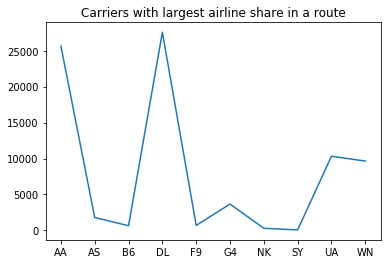

In [89]:
plt.title('Carriers with largest airline share in a route')
plt.xticks(range(len(x)), x)
plt.plot(x, list_len)

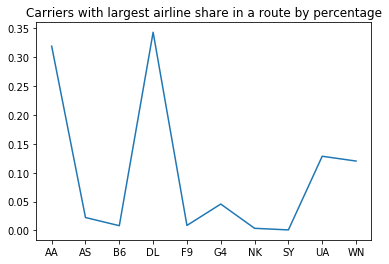

In [90]:
plt.title('Carriers with largest airline share in a route by percentage')
list_len = [number/len(airfares) for number in list_len]
plt.xticks(range(len(x)), x)
plt.plot(x, list_len)

In [102]:
low_grouped_airfares = airfares.groupby('carrier_low')
type(low_grouped_airfares)

AttributeError: Cannot access callable attribute 'drop' of 'DataFrameGroupBy' objects, try using the 'apply' method

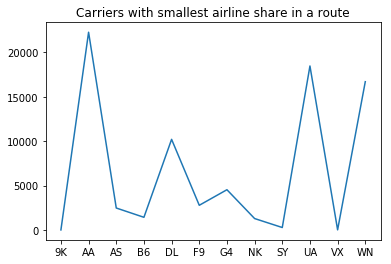

In [94]:
x, y = zip(*low_grouped_airfares)
list_len = []
for i in range(0,len(y)):
    list_len.append(len(y[i]))
plt.title('Carriers with smallest airline share in a route')
plt.xticks(range(len(x)), x)
plt.plot(x, list_len)

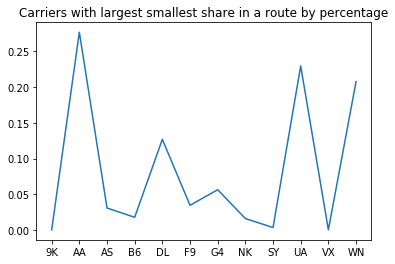

In [95]:
plt.title('Carriers with largest smallest share in a route by percentage')
list_len = [number/len(airfares) for number in list_len]
plt.xticks(range(len(x)), x)
plt.plot(x, list_len)

In [123]:
smallest_largest_same = airfares[(airfares['carrier_lg']==airfares['carrier_low'])].reset_index()

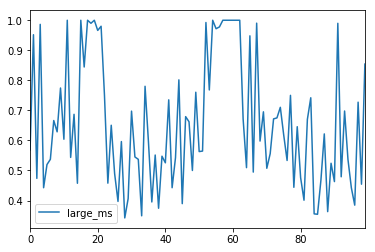

In [129]:
smallest_largest_same.head(100).plot(y='large_ms',kind = 'line')

In [152]:
smallest_largest_same.head(5)

,index,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg,net_income_lg,net_income_low
0,1,2018,1,ABE,PA,BNA,TN,685,234.59,AA,0.5686,227.73,AA,0.5686,227.73,1730210.46,1730210.46,308067.99,308067.99
1,2,2018,1,ABE,PA,CLT,NC,481,289.19,AA,0.9518,288.46,AA,0.9518,288.46,1730210.46,1730210.46,308067.99,308067.99
2,3,2018,1,ABE,PA,DEN,CO,1539,263.12,UA,0.4737,255.18,UA,0.4737,255.18,5475423.97,5475423.97,127138.49,127138.49
3,5,2018,1,ABE,PA,DTW,MI,425,237.99,DL,0.9863,237.32,DL,0.9863,237.32,7162960.00,7162960.00,325483.00,325483.00
4,6,2018,1,ABE,PA,IAH,TX,1350,389.08,AA,0.4426,361.04,AA,0.4426,361.04,1730210.46,1730210.46,308067.99,308067.99


In [136]:
#count unmber of unique routes where a monopoly exists
monopoly = airfares[(airfares['carrier_lg']==airfares['carrier_low']) & (airfares['large_ms']>0.99)]

In [130]:
#count number of unique routes
len(airfares[['Origin','Dest']].drop_duplicates())

13734

In [139]:
smallest_largest_same['large_ms'].value_counts(bins=10)

(0.923, 1.0]      7994
(0.459, 0.536]    5366
(0.536, 0.614]    5168
(0.614, 0.691]    3826
(0.382, 0.459]    3266
(0.691, 0.768]    3044
(0.768, 0.845]    2398
(0.845, 0.923]    1952
(0.305, 0.382]    1714
(0.226, 0.305]     244
Name: large_ms, dtype: int64

In [146]:
#distribution of largest airline on route with at least two airlines
airfares[airfares['carrier_lg']!=airfares['carrier_low']]['large_ms'].value_counts(bins=10)

(0.45, 0.527]     8964
(0.527, 0.604]    7832
(0.373, 0.45]     7180
(0.604, 0.681]    5940
(0.681, 0.758]    4228
(0.297, 0.373]    3972
(0.758, 0.835]    2812
(0.835, 0.912]    2272
(0.912, 0.989]    1486
(0.218, 0.297]     686
Name: large_ms, dtype: int64

In [148]:
#distribution of smallest airline on route with at least two airlines
airfares[airfares['carrier_lg']!=airfares['carrier_low']]['lf_ms'].value_counts(bins=10)

(0.108, 0.157]      8384
(0.157, 0.206]      7356
(0.206, 0.255]      6862
(0.255, 0.304]      5622
(0.304, 0.353]      4948
(0.353, 0.402]      3450
(0.059, 0.108]      2670
(0.00851, 0.059]    2598
(0.402, 0.451]      2394
(0.451, 0.5]        1088
Name: lf_ms, dtype: int64

In [153]:
airfares[(airfares['carrier_lg']!=airfares['carrier_low']) & (airfares['lf_ms']>0.451)].head(5)

,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg,net_income_lg,net_income_low
7,2018,1,ABE,PA,JAX,FL,783,241.50,DL,0.5200,244.32,AA,0.4720,236.25,1730210.46,7162960.00,325483.00,308067.99
132,2018,1,AGS,GA,DEN,CO,1335,239.92,DL,0.5123,269.21,AA,0.4836,209.89,1730210.46,7162960.00,325483.00,308067.99
134,2018,1,AGS,GA,DTW,MI,615,195.29,DL,0.5241,219.12,AA,0.4724,169.02,1730210.46,7162960.00,325483.00,308067.99
170,2018,1,ALB,NY,DCA,DC,325,170.50,AA,0.4937,179.79,WN,0.4679,160.20,4812708.00,1730210.46,308067.99,450336.00
211,2018,1,ALB,NY,SRQ,FL,1167,262.18,AA,0.4804,270.29,DL,0.4657,259.96,7162960.00,1730210.46,308067.99,325483.00


In [158]:
atleast_two_airlines = airfares[(airfares['carrier_lg']!=airfares['carrier_low'])].reset_index()

In [161]:
atleast_two_airlines

,index,Year,quarter,Origin,Origin_State,Dest,Dest_State,nsmiles,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,op_revenues_low,op_revenues_lg,net_income_lg,net_income_low
0,0,2018,1,ABE,PA,ATL,GA,692,286.40,DL,0.9455,287.18,AA,0.0339,263.31,1730210.46,7162960.00,325483.00,308067.99
1,4,2018,1,ABE,PA,DFW,TX,1307,261.68,AA,0.6448,260.94,UA,0.1081,200.66,5475423.97,1730210.46,308067.99,127138.49
2,7,2018,1,ABE,PA,JAX,FL,783,241.50,DL,0.5200,244.32,AA,0.4720,236.25,1730210.46,7162960.00,325483.00,308067.99
3,9,2018,1,ABE,PA,LAX,CA,2388,351.63,DL,0.4908,378.48,UA,0.2103,296.01,5475423.97,7162960.00,325483.00,127138.49
4,10,2018,1,ABE,PA,MCI,MO,1025,278.44,DL,0.6348,278.99,AA,0.2522,248.72,1730210.46,7162960.00,325483.00,308067.99
5,14,2018,1,ABE,PA,MSP,MN,948,259.98,DL,0.6849,271.57,UA,0.2397,213.99,5475423.97,7162960.00,325483.00,127138.49
6,15,2018,1,ABE,PA,MSY,LA,1111,251.19,AA,0.4821,264.19,UA,0.1429,211.44,5475423.97,1730210.46,308067.99,127138.49
7,23,2018,1,ABE,PA,SFO,CA,2500,356.61,DL,0.3878,369.15,AA,0.3469,338.38,1730210.46,7162960.00,325483.00,308067.99
8,31,2018,1,ABQ,NM,ATL,GA,1269,246.07,DL,0.6032,257.07,WN,0.2472,232.14,4812708.00,7162960.00,325483.00,450336.00
9,32,2018,1,ABQ,NM,AUS,TX,619,186.17,WN,0.5762,205.40,G4,0.1989,90.17,412680.86,4812708.00,450336.00,71091.85
